In [6]:
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy

In [7]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import constants as cs

base_url = 'http://localhost:8000/'

# Timeslot Usage: % of each appointment timeslot that is booked 

,% Timeslot Filled (5 Doctors)
Appointment Timeslot,
08:00:00,40.0
08:30:00,60.0
09:00:00,40.0
09:30:00,60.0
10:00:00,20.0
10:30:00,40.0
11:00:00,40.0
11:30:00,40.0
13:00:00,20.0


<AxesSubplot:title={'center':'Timeslot Usage (for 5 Doctors)'}, xlabel='Appointment Timeslot', ylabel='% Timeslot Filled'>

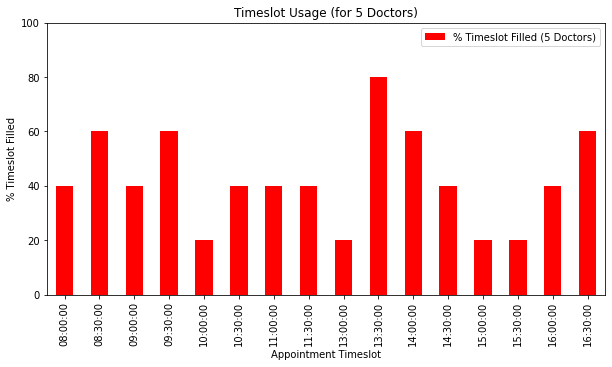

In [8]:
doctors_ids = [d['id'] for d in requests.get(base_url + 'employees-doctor-with-id-display-name').json()]

timeslots = [str(ts).replace(' ','T') for ts in cs.get_list_of_possible_available_appointment_datetimes_available_per_one_doctor_per_day()]

doctor_id_to_timeslots = {}

for doctor_id in doctors_ids:
    doctor_id_to_timeslots[doctor_id] = [a['date_and_time'] for a in requests.get(base_url + f'appointments-by-doctor-id-with-id-display-name/{doctor_id}').json()]
    
timeslot_to_doctor_ids = {}

for timeslot in timeslots:
    timeslot_to_doctor_ids[timeslot] = []
    for doctor_id in doctors_ids:
        if timeslot in doctor_id_to_timeslots[doctor_id]:
            timeslot_to_doctor_ids[timeslot].append(doctor_id)
            
data = {ts[-8:]: (len(timeslot_to_doctor_ids[ts]) * 1.0) / len(doctors_ids) * 100 for ts in timeslot_to_doctor_ids}

df = pd.DataFrame.from_dict(data, orient='index', columns=[f'% Timeslot Filled ({len(doctors_ids)} Doctors)'])

df.index.name = 'Appointment Timeslot'
display(df)

df.plot(kind='bar',
        color='red',
        xlabel='Appointment Timeslot',
        ylabel='% Timeslot Filled',
        ylim=(0,100),
        title= f'Timeslot Usage (for {len(doctors_ids)} Doctors)',
        figsize=(10, 5))


# Person Breakdown: % breakdown of persons in database (unassigned vs. patient, vs employee A/S/D) pie chart?

,# Person Type (of 58 People)
Person Type,
Patients,49
Admins,1
Staffs,3
Doctors,5
Un-Assigned,0


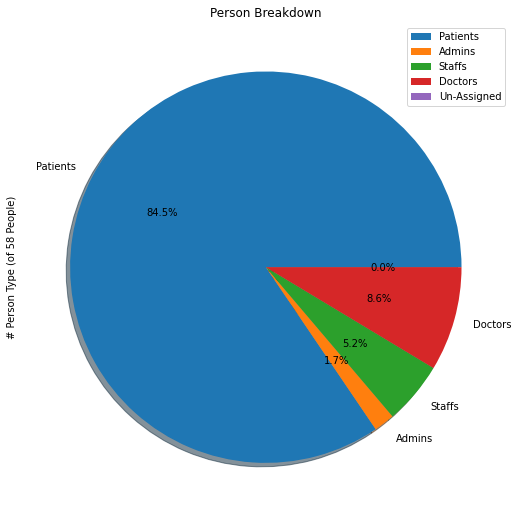

In [9]:
person_ids = [p['id'] for p in requests.get(base_url + 'persons').json()]

person_unassigned_ids = [p['id'] for p in requests.get(base_url + 'persons-unassigned').json()]

patient_ids = [p['id'] for p in requests.get(base_url + 'patients').json()]

employee_ids = [e['id'] for e in requests.get(base_url + 'employees').json()]

staff_ids = [a['id'] for a in requests.get(base_url + 'employees-staff-with-id-display-name').json()]

doctor_ids = [d['id'] for d in requests.get(base_url + 'employees-doctor-with-id-display-name').json()]

data = {'Patients': len(patient_ids), 'Admins': len(employee_ids) - len(staff_ids) - len(doctor_ids), 
        'Staffs': len(staff_ids), 'Doctors': len(doctor_ids), 'Un-Assigned': len(person_unassigned_ids)}

columns = [f'# Person Type (of {len(person_ids)} People)']
df = pd.DataFrame.from_dict(data, orient='index', columns=columns)

df.index.name = 'Person Type'

display(df)

import matplotlib.pyplot as plt

# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

ax = df.plot.pie(ax=ax, y=columns[0],
                 title="Person Breakdown",
                 legend=True,
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=0)

# Remove axes splines
#for s in ['top', 'bottom', 'left', 'right']:
#    ax.spines[s].set_visible(False)

# Remove x, y Ticks
#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
#ax.xaxis.set_tick_params(pad = 5)
#ax.yaxis.set_tick_params(pad = 10)


# Entity Count: # of rows/entities in each table (vertical bar chart)?

,# Entity Type In Database
Persons,58
Jobs,9
Employees,9
Patients,49
Units,4
Prescriptions,49
Appointments,34


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_10360/3752088447.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


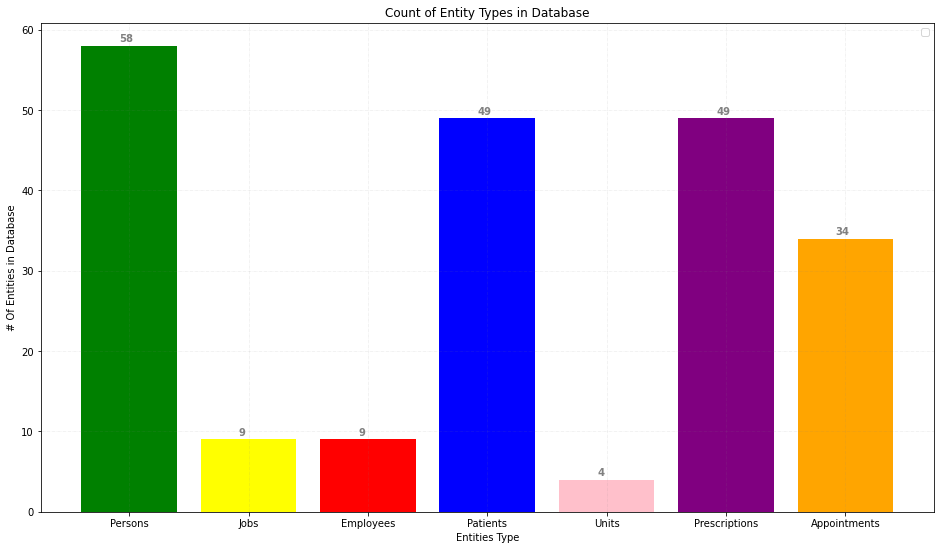

In [85]:

person_ids = [p['id'] for p in requests.get(base_url + 'persons').json()]

job_ids = [j['id'] for j in requests.get(base_url + 'jobs').json()]

employee_ids = [e['id'] for e in requests.get(base_url + 'employees').json()]

patient_ids = [p['id'] for p in requests.get(base_url + 'patients').json()]

unit_ids = [u['id'] for u in requests.get(base_url + 'units').json()]

prescription_ids = [p['id'] for p in requests.get(base_url + 'prescriptions').json()]

appointment_ids = [a['id'] for a in requests.get(base_url + 'appointments').json()]

data = {'Person': len(person_ids),
        'Job': len(job_ids),
        'Employee': len(employee_ids),
        'Patient': len(patient_ids),
        'Unit': len(unit_ids),
        'Prescription': len(prescription_ids),
        'Appointment': len(appointment_ids)}

columns = ['# Entity Type In Database']

df = pd.DataFrame.from_dict(data, orient='index', columns=columns)

display(df)

fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(x=list(df.index),
             height=list(df[columns[0]]),
             color=('green','yellow','red','blue','pink','purple','orange'),
        )

ax.set_xlabel('Entities Type')
ax.set_ylabel('# Of Entities in Database')
ax.set_title(f'Count of Entity Types in Database')
ax.legend()

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add annotation to bars
for i, p in enumerate(ax.patches):
    plt.text(i - p.get_width()/10, p.get_height()+0.5, str(p.get_height()),
            fontsize = 10, fontweight ='bold', color ='grey')
        